# <center>Disease prediction based on the patient symptoms</center>

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
# -----------------
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [2]:
# loading dataset
dataset_df = pd.read_csv('..\Datasets\Disease-symptom\dataset.csv')
disease_description_df = pd.read_csv('..\Datasets\Disease-symptom\disease_description.csv')
disease_precaution_df = pd.read_csv('..\Datasets\Disease-symptom\disease_precaution.csv')
symptom_severity_df = pd.read_csv('..\Datasets\Disease-symptom\symptom_severity.csv')
training_df = pd.read_csv('..\Datasets\Disease-symptom\Training.csv')
testing_df = pd.read_csv('..\Datasets\Disease-symptom\Testing.csv')

In [3]:
# Let's see the dataset df
dataset_df.head()

,Disease,Symptom_0,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AIDS,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AIDS,muscle_wasting,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle_wasting,patches_in_throat,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIDS,muscle_wasting,patches_in_throat,high_fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Let's explore the unique symptoms and diseases
unique_symptoms = []
unique_diseases = []
for column in dataset_df.columns:
    values = dataset_df[column].unique()
    for i in range(len(values)):
        if column == 'Disease':
            if values[i] not in unique_diseases:
                unique_diseases.append(values[i])
        else:
            if values[i] not in unique_symptoms:
                unique_symptoms.append(values[i])

# print("unique_symptoms: ", unique_symptoms)
# print("unique_diseases: ", unique_diseases)
# Let's see the length of unique symptoms and diseases
print("length of unique_symptoms: ", len(unique_symptoms))
print("length of unique_diseases: ", len(unique_diseases))


length of unique_symptoms:  141
length of unique_diseases:  42


In [5]:
# The training and testing dataset
training_df.head()


,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS


In [6]:
testing_df.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Alcoholic hepatitis
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Allergy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arthritis


In [7]:
print("Dimensions of training dataset: ", training_df.shape)
print("Dimensions of testing dataset: ", testing_df.shape)

Dimensions of training dataset:  (306, 135)
Dimensions of testing dataset:  (42, 135)


In [8]:
disease_description_df.head()

,Disease,Symptom_Description
0,AIDS,Acquired immunodeficiency syndrome (AIDS) is a...
1,Acne,"Acne vulgaris is the formation of comedones, p..."
2,Alcoholic hepatitis,"Alcoholic hepatitis is a diseased, inflammator..."
3,Allergy,An allergy is an immune system response to a f...
4,Arthritis,Arthritis is the swelling and tenderness of on...


In [9]:
disease_precaution_df.head()

,Disease,Symptom_precaution_0,Symptom_precaution_1,Symptom_precaution_2,Symptom_precaution_3
0,AIDS,avoid open cuts,wear ppe if possible,consult doctor,follow up
1,Acne,bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
2,Alcoholic hepatitis,stop alcohol consumption,consult doctor,medication,follow up
3,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
4,Arthritis,exercise,use hot and cold therapy,try acupuncture,massage


In [10]:
# symptom_severity_df.describe() --> The maximum value is 7.0 and minimum value is 1.0
symptom_severity_df.head()

,Symptom,Symptom_severity
0,abdominal_pain,4
1,abnormal_menstruation,6
2,acidity,3
3,acute_liver_failure,6
4,altered_sensorium,2


In [11]:
print("Unique diseases in the training df: ",len(training_df['prognosis'].unique()))
print("Unique diseases in the testing df: ",len(testing_df['prognosis'].unique()))
print("Unique diseases in the dataset df: ",len(dataset_df['Disease'].unique()))
print("Unique diseases in the disease_description df: ",len(disease_description_df['Disease'].unique()))
print("Unique diseases in the disease_precaution df: ",len(disease_precaution_df['Disease'].unique()))

Unique diseases in the training df:  43
Unique diseases in the testing df:  42
Unique diseases in the dataset df:  42
Unique diseases in the disease_description df:  42
Unique diseases in the disease_precaution df:  42


### Conclusions:
#### - We have 42 diseases in total with their possible symptoms, descriptions and precautions to take.
#### - The training df has an additional disease that is probably just a typo of another disease (because all the dfs has 42 diseases)
#### - The Training and Testing dfs are a better and exploitable version of the actual Dataset, so we won't need it anymore.
#### --> For now we will try to use these dfs (training and testing) to train our models that will predict the diseases

## Data preprocessing

In [12]:
# Data cleaning
# Let's check for null values
print("Null values in training df: ", training_df.isnull().sum().sum())
print("Null values in testing df: ", testing_df.isnull().sum().sum())

Null values in training df:  0
Null values in testing df:  0


In [13]:
# As we said earlier, the training df has 1 more disease than the testing df, let's find out which disease is that
for disease in training_df['prognosis'].unique():
    if disease not in testing_df['prognosis'].unique():
        print(disease)
        break

Paralysis (brain hemorrhageH


In [14]:
# Apparently that's just a spelling mistake, let's find the correct spelling
training_df['prognosis'].value_counts().reset_index()

,index,prognosis
0,Dengue,10
1,Hepatitis D,10
2,Chicken pox,10
3,Migraine,10
4,Diabetes,9
5,Hypoglycemia,9
6,Hepatitis B,9
7,Hepatitis A,9
8,Jaundice,9
9,Hyperthyroidism,9


In [15]:
# The correct spelling is 'Paralysis (brain hemorrhage)' and not 'Paralysis (brain hemorrhageH'
# Let's replace the wrong spelling with the correct one
training_df['prognosis'] = training_df['prognosis'].replace('Paralysis (brain hemorrhageH', 'Paralysis (brain hemorrhage)')
# Let's check if the spelling is corrected
training_df['prognosis'].value_counts().reset_index()

,index,prognosis
0,Dengue,10
1,Hepatitis D,10
2,Chicken pox,10
3,Migraine,10
4,Diabetes,9
5,Hypoglycemia,9
6,Hepatitis B,9
7,Hepatitis A,9
8,Jaundice,9
9,Hyperthyroidism,9


In [16]:
# Let's check for duplicates
print("Duplicates in training df: ", training_df.duplicated().sum())
print("Duplicates in testing df: ", testing_df.duplicated().sum())

Duplicates in training df:  0
Duplicates in testing df:  0


In [17]:
# Let's split the training and testing df into X and y
X_train = training_df.drop('prognosis', axis=1)
y_train = training_df['prognosis']
X_test = testing_df.drop('prognosis', axis=1)
y_test = testing_df['prognosis']
# Let's build 2 models and compare their performance (Random Forest Classifier and K Nearest Neighbors Classifier)

## Model fitting

### Random Forest Classifier

In [18]:
# Let's first build the Random Forest Classifier
rfc = RandomForestClassifier() # n_estimators is the number of trees in the forest
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred_rfc=rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_rfc))
print('F1-score:', f1_score(y_test, y_pred_rfc, average='macro'))

Accuracy: 1.0
F1-score: 1.0


<AxesSubplot:>

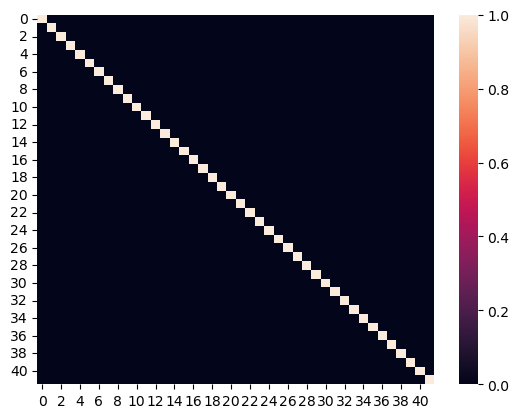

In [20]:
conf_mat = confusion_matrix(y_test, y_pred_rfc)
df_cm = pd.DataFrame(conf_mat)
sns.heatmap(df_cm)

In [21]:
# classification report
print(classification_report(y_test, y_pred_rfc))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       1.00      1.00      1.00         1
          Alcoholic hepatitis       1.00      1.00      1.00         1
                      Allergy       1.00      1.00      1.00         1
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         1
         Cervical spondylosis       1.00      1.00      1.00         1
                  Chicken pox       1.00      1.00      1.00         1
          Chronic cholestasis       1.00      1.00      1.00         1
                  Common Cold       1.00      1.00      1.00         1
                        Covid       1.00      1.00      1.00         1
                       Dengue       1.00      1.00      1.00         1
                    Diabetes        1.00      1.00      1.00         1
 Dimo

### K Nearest Neighbors Classifier

In [22]:
# Let's build the K Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Let's predict the values
y_pred_knn = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_knn))
print('F1-score:', f1_score(y_test, y_pred_knn, average='macro'))

Accuracy: 0.9761904761904762
F1-score: 0.9682539682539681


In [24]:
# Let's find the best value for n_neighbors
# Create a max accuracy variable and set it to 0 to store the maximum accuracy
max_accuracy = 0
best_n = -1
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    if (accuracy_score(y_test, y_pred) >= max_accuracy):
        max_accuracy = accuracy_score(y_test, y_pred)
        best_n = i
print("Best value for n_neighbors: ", best_n)
print("Max accuracy: ", max_accuracy)

Best value for n_neighbors:  3
Max accuracy:  1.0


In [25]:
knn = KNeighborsClassifier(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
# classification report
print(classification_report(y_test, y_pred_knn))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       1.00      1.00      1.00         1
          Alcoholic hepatitis       1.00      1.00      1.00         1
                      Allergy       1.00      1.00      1.00         1
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         1
         Cervical spondylosis       1.00      1.00      1.00         1
                  Chicken pox       1.00      1.00      1.00         1
          Chronic cholestasis       1.00      1.00      1.00         1
                  Common Cold       1.00      1.00      1.00         1
                        Covid       1.00      1.00      1.00         1
                       Dengue       1.00      1.00      1.00         1
                    Diabetes        1.00      1.00      1.00         1
 Dimo

In [26]:
# SVC model
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_svc))
print('F1-score:', f1_score(y_test, y_pred_svc, average='macro'))

Accuracy: 1.0
F1-score: 1.0


In [27]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_lr))
print('F1-score:', f1_score(y_test, y_pred_lr, average='macro'))

Accuracy: 1.0
F1-score: 1.0


In [28]:
# Neural Network
nn = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_nn))
print('F1-score:', f1_score(y_test, y_pred_nn, average='macro'))

Accuracy: 1.0
F1-score: 1.0


In [35]:
import random
import numpy as np

colums = X_train.columns
# random number of symptoms but  not equal to the number of symptoms in the training dataset
symptoms_num = random.randint(1, len(colums)//2)
# random symptoms
symptoms = []
for i in range(symptoms_num):
    symptoms.append(colums[random.randint(0, len(colums)-1)])
# we need to create a dataframe with the same columns as the training dataset
symptoms_df = pd.DataFrame(columns=X_train.columns)
# we need to add the symptoms to the dataframe
symptoms_df.loc[0] = 0
for symptom in symptoms:
    symptoms_df[symptom] = 1

# predict the disease using both models
disease = knn.predict(symptoms_df)
confidence = np.max(knn.predict_proba(symptoms_df)) 

disease1 = rfc.predict(symptoms_df)
confidence1 = np.max(rfc.predict_proba(symptoms_df))

disease2 = svc.predict(symptoms_df)
confidence2 = np.max(svc.predict_proba(symptoms_df))

disease3 = lr.predict(symptoms_df)
confidence3 = np.max(lr.predict_proba(symptoms_df))

disease4 = nn.predict(symptoms_df)
confidence4 = np.max(nn.predict_proba(symptoms_df))


# Let's plot a table with the results of the 5 models and the confidence of each model
results = pd.DataFrame(columns=['Model', 'Predicted Disease', 'Confidence'])
results.loc[0] = ['KNN', disease[0], confidence]
results.loc[1] = ['Random Forest', disease1[0], confidence1]
results.loc[2] = ['SVC', disease2[0], confidence2]
results.loc[3] = ['Logistic Regression', disease3[0], confidence3]
results.loc[4] = ['Neural Network', disease4[0], confidence4]

results

,Model,Predicted Disease,Confidence
0,KNN,Psoriasis,1.000000
1,Random Forest,Hypothyroidism,0.160000
2,SVC,Dengue,0.042487
3,Logistic Regression,Psoriasis,0.230535
4,Neural Network,Migraine,0.627570


In [ ]:
symptoms

In [31]:
# save the models
import pickle
pickle.dump(knn, open('../Models/knn_model.pkl', 'wb'))
pickle.dump(rfc, open('../Models/rfc_model.pkl', 'wb'))
pickle.dump(svc, open('../Models/svc_model.pkl', 'wb'))
pickle.dump(lr, open('../Models/lr_model.pkl', 'wb'))
pickle.dump(nn, open('../Models/nn_model.pkl', 'wb'))


In [32]:
# export the columns names to txt file to use it in the web app (comma separated)
# with open('..\python project\static\symptoms.txt', 'w') as f:
#     for item in X_train.columns.tolist():
#         # if the item is the last one, don't add a comma
#         if item != X_train.columns.tolist()[-1]:
#             f.write("%s," % item)
#         else:
#             f.write("%s" % item)
